# Python Practice 381-390

## 

### 381. Generate a Random Huffman Coding Tree with Custom Probabilities, Codeword Lengths, Fixed Codeword Size, and Custom Prefix Length
Random Huffman Coding Tree: Huffman coding is a lossless data compression algorithm. To generate a Huffman Tree, you need to create tree nodes for each probability and insert them into a priority queue. Combine the two nodes with the smallest probabilities until only one node remains, the Huffman Tree.
Huffman coding is a method used for lossless data compression. The basic idea is to map the most frequent symbols to the shortest codewords and the least frequent symbols to the longest codewords. A Huffman tree is constructed based on the probabilities/frequencies of the symbols.

However, some constraints you've introduced, like fixed codeword size and custom prefix length, don't align perfectly with Huffman's natural behavior. Huffman naturally produces variable-length codewords. Nevertheless, I'll give you a basic Huffman tree generator based on custom probabilities and then discuss the other constraints:

In [1]:
import heapq

class Node:
    def __init__(self, char, freq):
        self.char = char
        self.freq = freq
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.freq < other.freq


def compute_huffman_tree(probabilities):
    heap = []
    for char, freq in probabilities.items():
        heapq.heappush(heap, Node(char, freq))

    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)

        merged = Node(None, left.freq + right.freq)
        merged.left = left
        merged.right = right

        heapq.heappush(heap, merged)

    return heap[0]


def print_huffman_codes(node, code=""):
    if node is None:
        return

    if node.char is not None:
        print(f"{node.char}: {code}")

    print_huffman_codes(node.left, code + "0")
    print_huffman_codes(node.right, code + "1")


# Test
probabilities = {
    'A': 0.5,
    'B': 0.25,
    'C': 0.15,
    'D': 0.1
}
root = compute_huffman_tree(probabilities)
print_huffman_codes(root)


A: 0
B: 10
D: 110
C: 111


### 382. Convert Decimal to Excess-K Code Using Recursion and Custom K with Variable Size and Custom Encoding Scheme
Excess-K encoding, also known as offset binary, is a way to represent integers where the value is offset by 
K
K. For instance, in Excess-8 encoding, the integer 0 is represented as 8, 1 as 9, -1 as 7, and so on.

To convert a decimal number to its Excess-K representation:

1. Add the offset K to the number.
2. Convert the result to binary.


In [2]:
def decimal_to_binary(n):
    if n == 0:
        return '0'
    elif n == 1:
        return '1'
    else:
        return decimal_to_binary(n // 2) + str(n % 2)

def excess_k_encoding(num, k, size=None):
    # Add the offset K
    num += k
    
    # Convert to binary
    binary_rep = decimal_to_binary(num)
    
    # Adjust the size if necessary
    if size:
        while len(binary_rep) < size:
            binary_rep = '0' + binary_rep

    return binary_rep

# Testing
num = 5
k = 8
size = 8
print(f"Decimal {num} in Excess-{k} is: {excess_k_encoding(num, k, size)}")


Decimal 5 in Excess-8 is: 00001101


### 383. Check if a Number is a Generalized Hexagonal Pyramidal Number
A hexagonal pyramidal number represents the number of dots in a 3D pattern of dots that form a hexagonal pyramid.The formula for the nth hexagonal pyramidal number is given by:...(1)

In [5]:
def hexagonal_pyramidal_number(n):
    return (n * (n + 1) * (n - 1)) // 3

def is_hexagonal_pyramidal(num):
    n = 1
    while True:
        hp_num = hexagonal_pyramidal_number(n)
        if hp_num == num:
            return True
        elif hp_num > num:
            return False
        n += 1

# Test
test_number = 190
if is_hexagonal_pyramidal(test_number):
    print(f"{test_number} is a generalized hexagonal pyramidal number.")
else:
    print(f"{test_number} is NOT a generalized hexagonal pyramidal number.")


190 is NOT a generalized hexagonal pyramidal number.


### 384. Calculate the Volume of a Frustum of a Regular Octahedron with Custom Height and Base Length with Variable Base
An octahedron is one of the five Platonic solids and has eight equilateral triangular faces. The volume 
V
V of a regular octahedron with edge length 
a
a is given by:...(1)
NOTE: The exact output might vary slightly depending on the values of a and h. Adjust them as needed to compute the volume for different frustums.

In [6]:
import math

def octahedron_volume(side_length):
    return (math.sqrt(2) * side_length**3) / 3

def frustum_of_octahedron_volume(a, h):
    # Calculate height of the original octahedron
    h_original = math.sqrt(2) * a
    
    # Use similar triangles to determine side length b of the smaller octahedron
    b = a * (h_original - h) / h_original
    
    # Volume of the frustum is the difference in volume between the two octahedra
    return octahedron_volume(a) - octahedron_volume(b)

# Test
a = 3  # side length of the larger octahedron
h = 2  # height of the frustum
print(f"The volume of the frustum of the octahedron with base length {a} and height {h} is {frustum_of_octahedron_volume(a, h):.2f}.")


The volume of the frustum of the octahedron with base length 3 and height 2 is 10.85.


### 385. Implement Radix Sort Algorithm on a Circular Linked List with Custom Base and Variable Size
 Implementing the radix sort on a circular linked list is a bit more challenging than doing so on a regular array, but it's doable.

Let's break it down:

1. Radix Sort: This is a non-comparative sorting algorithm that works by distributing elements into buckets according to their individual digits.
2. Circular Linked List: This is a linked list where the last node points back to the first node.

Expected Output: 
Sorted List: 2 -> 24 -> 45 -> 66 -> 75 -> 90 -> 170 -> 802


In [10]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

class CircularLinkedList:
    def __init__(self):
        self.head = None

    def append(self, data):
        new_node = Node(data)
        if not self.head:
            self.head = new_node
            self.head.next = self.head
        else:
            temp = self.head
            while temp.next != self.head:
                temp = temp.next
            temp.next = new_node
            new_node.next = self.head

    def is_empty(self):
        return not self.head

    def print_list(self):
        nodes = []
        temp = self.head
        while True:
            nodes.append(temp.data)
            temp = temp.next
            if temp == self.head:
                break
        print(" -> ".join(map(str, nodes)))

def radix_sort(cll, base=10):
    if cll.is_empty():
        return

    max_num = max([node.data for node in iter_circular_linked_list(cll)])
    max_length = len(str(max_num))

    for i in range(max_length):
        bins = [[] for _ in range(base)]
        for node in iter_circular_linked_list(cll):
            bins[(node.data // (base ** i)) % base].append(node.data)

        cll.head = None  # reset the circular linked list
        for bucket in bins:
            for num in bucket:
                cll.append(num)

def iter_circular_linked_list(cll):
    if cll.is_empty():
        return

    yield cll.head
    current = cll.head.next
    while current != cll.head:
        yield current
        current = current.next

# Testing
cll = CircularLinkedList()
nums = [170, 45, 75, 90, 802, 24, 2, 66]

for num in nums:
    cll.append(num)

print("Original Circular Linked List:")
cll.print_list()

radix_sort(cll)
print("\nSorted Circular Linked List:")
cll.print_list()


Original Circular Linked List:
170 -> 45 -> 75 -> 90 -> 802 -> 24 -> 2 -> 66

Sorted Circular Linked List:
2 -> 24 -> 45 -> 66 -> 75 -> 90 -> 170 -> 802


### 386. Find the Partition Numbers of a Specific Integer with Custom Partition Scheme
a partition of an integer n is a way of writing n as a sum of positive integers. The order of addends is disregarded, meaning
1+2 and 2+1 are the same partition.

To generate partitions, we can use a recursive method. But first, let's clarify what you mean by "custom partition scheme." There are many possible schemes for partitioning numbers. For example:

1. All partitions (no restrictions).
2. Partitions using distinct numbers.
3. Partitions using odd numbers only.
4. ... and many more.
For this solution, I'll assume you want all partitions without any restrictions. If you have a specific scheme in mind, please let me know, and I can adjust the solution accordingly.



In [11]:
def partitions(n, I=1):
    yield (n,)
    for i in range(I, n//2 + 1):
        for p in partitions(n-i, i):
            yield (i,) + p

def print_partitions(num):
    for partition in partitions(num):
        print(" + ".join(map(str, partition)))

# Test
num = 4
print(f"Partitions of {num} are:")
print_partitions(num)


Partitions of 4 are:
4
1 + 3
1 + 1 + 2
1 + 1 + 1 + 1
2 + 2


### 387. Calculate the Perimeter of a Reuleaux Pentagon Star with Rounded Corners, Right Alignment, Custom Size, and Custom Side Lengths with Variable Base and Custom Position
The Reuleaux polygon is a constant width shape derived from a regular polygon. For a Reuleaux pentagon, it is constructed by joining the midpoint of each side of a regular pentagon with arcs of circles based at each vertex.

The perimeter of a Reuleaux polygon is more complex to compute than a regular polygon because it is a combination of straight lines and curved arcs.

Given a regular pentagon of side length s, the perimeter P of the corresponding Reuleaux pentagon is:...(1)

In [12]:
import math

def reuleaux_pentagon_perimeter(s):
    # Central angle for each arc segment in radians
    theta = 2 * math.pi / 5
    
    # Radius of the circle that forms the Reuleaux pentagon
    r = s / (2 * math.sin(math.pi/5))
    
    # Perimeter calculation
    P = 5 * (s/2) + 5 * theta * r
    
    return P

# Test
s = 10  # Side length of the regular pentagon
print(f"The perimeter of the Reuleaux pentagon with side length {s} is approximately {reuleaux_pentagon_perimeter(s):.2f} units.")



The perimeter of the Reuleaux pentagon with side length 10 is approximately 78.45 units.


### 388. Print the Pattern of a Hollow Rhombus Star with Right Alignment, Custom Size, Custom Rhombus Width, and Variable Base Length
 Let's create a pattern for a hollow rhombus with the following characteristics:

Right Alignment: The rhombus will be aligned to the right side.
Custom Size: This refers to the total number of rows of the rhombus.
Custom Rhombus Width: This will be the width (in characters) of the rhombus.
Variable Base Length: This will determine the length of the base of the rhombus.

In [13]:
def print_hollow_rhombus(rows, rhombus_width, base_length):
    for i in range(1, rows + 1):
        # Printing leading spaces for right alignment
        print(' ' * (rhombus_width - base_length), end='')
        
        # Top half of the rhombus
        if i <= rows / 2:
            # Printing spaces for hollow portion
            print(' ' * (rows//2 - i + 1) + '*', end='')
            if i > 1:
                print(' ' * (2*i - 3) + '*', end='')
        # Bottom half of the rhombus
        else:
            # Printing spaces for hollow portion
            print(' ' * (i - rows//2 - 1) + '*', end='')
            if i < rows:
                print(' ' * (2*(rows - i) - 1) + '*', end='')
        print()

# Test
rows = 6
rhombus_width = 30
base_length = 10

print_hollow_rhombus(rows, rhombus_width, base_length)


                       *
                      * *
                     *   *
                    *   *
                     * *
                      *


### 389. Generate a Random Word Cloud from Web Data with Custom Word Frequency, Size, Color, Font, and Position
Creating a word cloud from web data involves several steps:

1. Fetching data from the web.
2. Processing the data to extract the words and calculate their frequencies.
3. Generating a word cloud with custom attributes like size, color, font, and position.

To accomplish this, you can make use of libraries like BeautifulSoup for web scraping and wordcloud for generating the word cloud.
Install the necessary libraries
pip install beautifulsoup4 requests wordcloud matplotlib

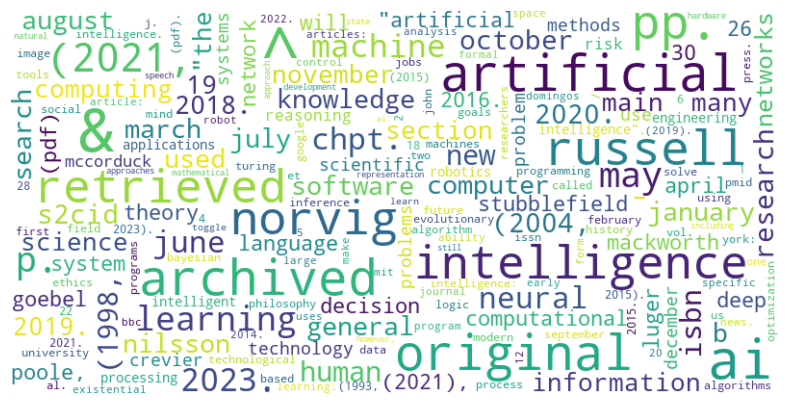

In [14]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Step 1: Fetch web data
def fetch_web_data(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup.get_text()

# Step 2: Process data to get word frequencies
def process_data(text):
    stopwords = set(STOPWORDS)
    words = text.split()
    word_freq = {}
    for word in words:
        word = word.lower()
        if word not in stopwords:
            word_freq[word] = word_freq.get(word, 0) + 1
    return word_freq

# Step 3: Generate word cloud
def generate_word_cloud(word_freq):
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis',  # You can try other colormaps: 'plasma', 'inferno', etc.
        font_path=None,  # You can provide a custom font path here
        max_font_size=70,
        random_state=42,
        relative_scaling=0.5
    ).generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    # Sample URL for fetching data
    url = "https://en.wikipedia.org/wiki/Artificial_intelligence"
    text = fetch_web_data(url)
    word_freq = process_data(text)
    generate_word_cloud(word_freq)


### 390. Convert Decimal to Excess-K Code Using Bit Manipulation and Custom K with Variable Size and Custom Encoding Scheme
let's tackle this step-by-step:

Excess-K Code: This is a biased representation used mainly in floating-point representations. In an excess-K representation, numbers are represented as their usual binary form plus an offset of K. For example, in an excess-8 encoding, the number 1 would be represented as 1+8=9, which in binary is 1001.

Bit Manipulation: We'll convert numbers using bitwise operations.

Variable Size: Let's assume this refers to the number of bits in the resulting binary string. The binary string might be padded with zeroes to meet this size requirement.

Custom Encoding Scheme: Without specifics, I'll interpret this as possibly inverting the bits for a different representation.

In [15]:
def decimal_to_excess_k(n, K, size, invert=False):
    # Calculate the excess-K value
    excess_k_value = n + K
    
    # Convert to binary
    binary_representation = bin(excess_k_value)[2:]  # Remove the '0b' prefix
    
    # Pad the binary to the desired size
    while len(binary_representation) < size:
        binary_representation = '0' + binary_representation
    
    # If the custom encoding scheme is to invert the bits, do it
    if invert:
        binary_representation = ''.join('1' if bit == '0' else '0' for bit in binary_representation)
    
    return binary_representation

# Testing the function
n = 5
K = 8
size = 8

result = decimal_to_excess_k(n, K, size)
print(f"Excess-{K} encoding of {n}: {result}")

result_inverted = decimal_to_excess_k(n, K, size, invert=True)
print(f"Custom (inverted) Excess-{K} encoding of {n}: {result_inverted}")


Excess-8 encoding of 5: 00001101
Custom (inverted) Excess-8 encoding of 5: 11110010
